In [1]:
from textblob import TextBlob
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from PIL import Image

In [5]:
#Load data
headlinedata = pd.read_csv('../data/scraped/combined_headlines.csv')
stripped = headlinedata.titles.apply(lambda x: x.strip('"\' ' ))
headlines_clean = headlinedata[~headlinedata.titles.duplicated(keep='first')]
headlines = headlines_clean['titles']

In [7]:
#Set publish date to datetime object
headlinedata['date'] = pd.to_datetime(headlinedata['date'], yearfirst=True, format='%Y-%m-%d')
data = headlinedata.copy()

In [31]:
#Divide data for easier processing
#Not really useful now
yr0304 = data[data['date'].dt.year == 2003].append(data[data['date'].dt.year == 2004])
yr0506 = data[data['date'].dt.year == 2005].append(data[data['date'].dt.year == 2006])
yr0708 = data[data['date'].dt.year == 2007].append(data[data['date'].dt.year == 2008])
yr0910 = data[data['date'].dt.year == 2009].append(data[data['date'].dt.year == 2010])
yr1112 = data[data['date'].dt.year == 2011].append(data[data['date'].dt.year == 2012])
yr1314 = data[data['date'].dt.year == 2013].append(data[data['date'].dt.year == 2014])
yr1516 = data[data['date'].dt.year == 2015].append(data[data['date'].dt.year == 2016])
yr17 = data[data['date'].dt.year == 2017].reset_index(drop=True)

In [32]:
#function to grab sentiment stats
def get_sentiments(dataframe):
    polarity = []
    subjectivity = []
    for index, row in dataframe.iterrows():
        headline = TextBlob(str(row['titles']))
        polarity.append(headline.polarity)
        subjectivity.append(headline.subjectivity)
    sentiments = pd.DataFrame({'polarity': polarity, 'subjectivity': subjectivity})
    return sentiments

In [33]:
#function to append sentiment stats to the csv
def appendtocsv(dataframe):
    with open('sentiments.csv', 'a') as f:
        dataframe.to_csv(f, mode='a', header = False, index=False)

In [34]:
#function to start the csv file for sentiment stats
def writetocsv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

In [35]:
#Get sentiment stats and append to csv file
sentiments = get_sentiments(yr17)
#appendtocsv(sentiments)

In [36]:
#Load in the sentiment stats and append headline dataframe
#sentiments = pd.read_csv('sentiments.csv')

alldata = pd.concat([yr17, sentiments], axis=1)
alldata

,Unnamed: 0,date,titles,polarity,subjectivity
0,71342,2017-01-01,"Wanderers, Perth fight out NYE draw",0.000000,0.000000
1,71343,2017-01-01,Queen misses second church service due to hea...,-0.231250,0.468750
2,71344,2017-01-01,Manus Island asylum seekers bashed on New Yea...,0.136364,0.454545
3,71345,2017-01-01,New UN chief Antonio Guterres issues 'appeal ...,0.136364,0.454545
4,71346,2017-01-01,News in 90 Seconds,0.000000,0.000000
5,71347,2017-01-01,News in 90 Seconds,0.000000,0.000000
6,71348,2017-01-01,"Burundi Environment Minister shot dead, polic...",-0.200000,0.400000
7,71349,2017-01-01,"Phoenix, Adelaide United held to goal-less draw",0.000000,0.000000
8,71350,2017-01-01,The best photos from New Year's around the wo...,0.568182,0.377273
9,71351,2017-01-01,Ponting named Australia's T20 assistant coach...,0.000000,0.000000


# Python Sentiments

In [37]:
#Label Sentiment column based on polarity value
alldata['Sentiment'] = np.where(alldata['polarity'] < 0, 'negative', 
                                (np.where(alldata['polarity'] > 0, 'positive', 'neutral')))

In [38]:
alldata

,Unnamed: 0,date,titles,polarity,subjectivity,Sentiment
0,71342,2017-01-01,"Wanderers, Perth fight out NYE draw",0.000000,0.000000,neutral
1,71343,2017-01-01,Queen misses second church service due to hea...,-0.231250,0.468750,negative
2,71344,2017-01-01,Manus Island asylum seekers bashed on New Yea...,0.136364,0.454545,positive
3,71345,2017-01-01,New UN chief Antonio Guterres issues 'appeal ...,0.136364,0.454545,positive
4,71346,2017-01-01,News in 90 Seconds,0.000000,0.000000,neutral
5,71347,2017-01-01,News in 90 Seconds,0.000000,0.000000,neutral
6,71348,2017-01-01,"Burundi Environment Minister shot dead, polic...",-0.200000,0.400000,negative
7,71349,2017-01-01,"Phoenix, Adelaide United held to goal-less draw",0.000000,0.000000,neutral
8,71350,2017-01-01,The best photos from New Year's around the wo...,0.568182,0.377273,positive
9,71351,2017-01-01,Ponting named Australia's T20 assistant coach...,0.000000,0.000000,neutral


In [39]:
#Get count of Positive, Negative, and Neutral
Moods = alldata.groupby('Sentiment')
Moods_dist = Moods['titles'].count()

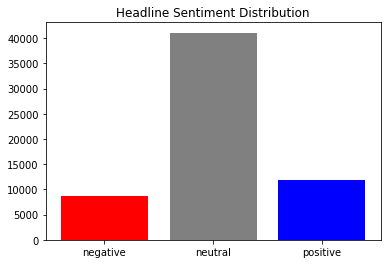

In [40]:
#Plot the moods/sentiment count
x = np.arange(3)
plt.bar(x, Moods_dist, color=['red','gray','blue'])
plt.xticks(x, Moods_dist.index)
plt.title('Headline Sentiment Distribution')
plt.show()

# R Sentiments

In [12]:
#R Sentiment Values
rsentiments = pd.read_csv('rsentiments.csv')
Rdata = pd.concat([headlinedata, rsentiments], axis=1)

In [14]:
#Get count of Positive, Negative, and Neutral
Moods2 = Rdata.groupby('x')
Moods_dist2 = Moods2['headline_text'].count()

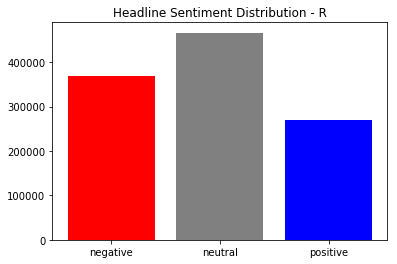

In [15]:
#Plot the moods/sentiment count
x = np.arange(3)
plt.bar(x, Moods_dist2, color=['red','gray','blue'])
plt.xticks(x, Moods_dist2.index)
plt.title('Headline Sentiment Distribution - R')
plt.show()

# WordCloud

In [8]:
#Combine all headlines into one string
text = headlines.tolist()
text = ' '.join(text)

In [27]:
#Import stencil for word cloud
stencil = np.array(Image.open('australia.jpg'))

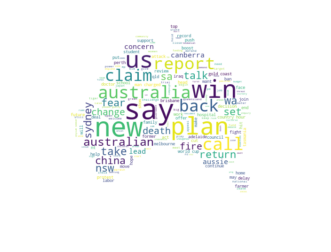

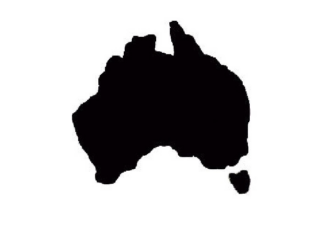

In [31]:
#Word cloud shaped like Australia
wc = WordCloud(background_color='white',max_words=1000, mask=stencil, max_font_size=60)
wc.generate(text)
wc.to_file("wordmap.png")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(stencil, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

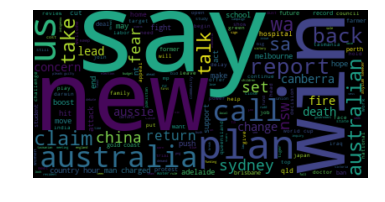

In [98]:
#Simple Word Cloud
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()